In [ ]:
!pip install pyproj

In [ ]:
!pip install geopandas

In [ ]:
!pip uninstall cython -y
!pip install cython
!pip uninstall cartopy -y
!pip install cartopy

Found existing installation: Cython 3.0.2
Uninstalling Cython-3.0.2:
  Successfully uninstalled Cython-3.0.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 24.2 MB/s eta 0:00:00


In [ ]:
!apt-get -qq install python-cartopy python3-cartopy
!pip uninstall -y shapely    # cartopy and shapely aren't friends (early 2020)
!pip install shapely --no-binary shapely

E: Unable to locate package python-cartopy
Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.5/275.5 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for shapely: filename=shapely-2.0.1-cp310-cp310-linux_x86_64.whl size=890035 sha256=b1bc5fbcc2cea8d8c3426aa8b039674bdf117c1b90027b7a7bbb13747cc31093
  Stored in directory: /root/.cache/pip/wheels/07/bd/06/4e979fa263bca266484ee65f5aab8e6b1c9b20f8caa6f2d7da
Successfully built shapely


In [ ]:
import pandas as pd
import pyproj
import math
import matplotlib.pyplot as plt
import seaborn as sb
import urllib.request

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm

import numpy as np

import cartopy
import cartopy.crs as ccrs                   # for projections
import cartopy.feature as cfeature           # for features
import cartopy.io.shapereader as shapereader
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.feature.nightshade import Nightshade
import geopandas as gpd
import random
from shapely.geometry import Point, Polygon
import time

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
#Creación de la proyección
P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)


In [ ]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000,710198.574916,780930.648555


In [ ]:
df2 = df[['x', 'y']]

In [ ]:
df2

,x,y
0,709584.027559,782579.281866
1,709262.121378,782963.354103
2,710847.924654,784163.825097
3,710863.366771,781635.895608
4,709314.159319,781570.969374
...,...,...
1257,709918.546763,782204.438977
1258,709466.644754,781388.734012
1259,709492.782783,784279.996264
1260,710198.574916,780930.648555


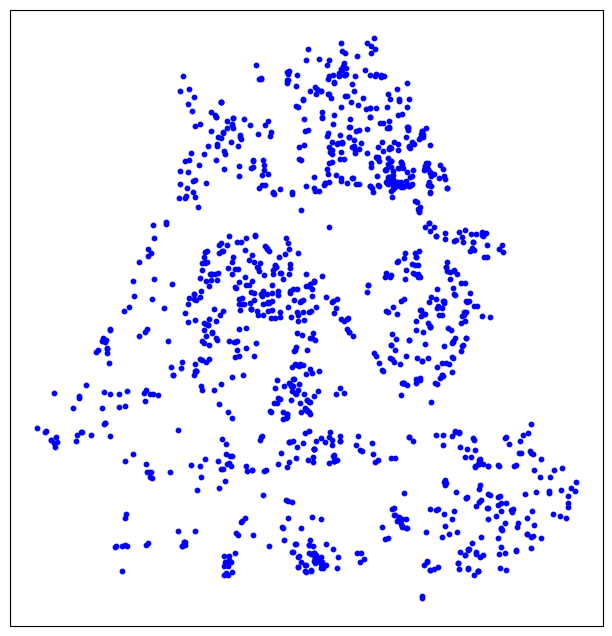

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)
plt.show()

In [ ]:
#Se carga la cartografía de Floridablanca
url = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/'

file_list = ["68276_urbano.cpg", "68276_urbano.dbf", "68276_urbano.prj", "68276_urbano.shp", "68276_urbano.shx"]

for file in file_list:
    urllib.request.urlretrieve(url+file, file)

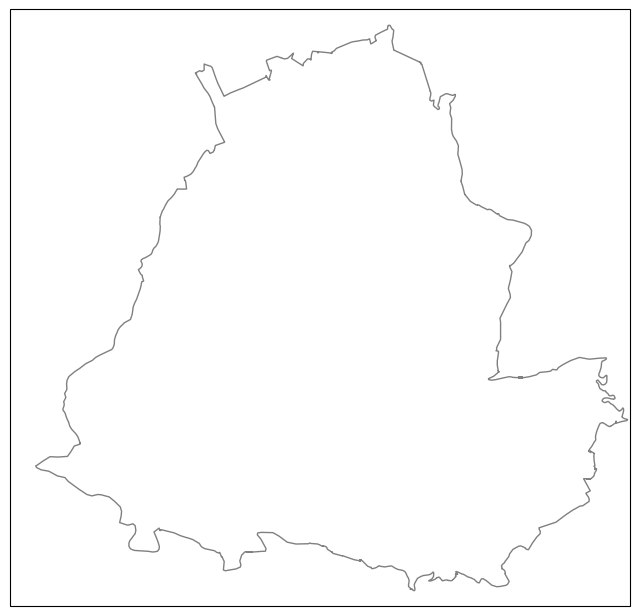

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

plt.show()

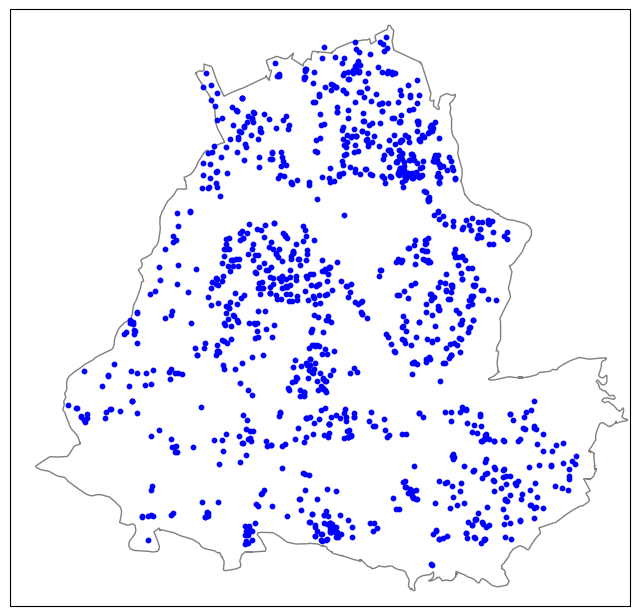

In [ ]:
subplot_kw = dict(projection=ccrs.PlateCarree())

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Puntos Floridablanca
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005

ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

reader = shapereader.Reader('68276_urbano.shp')

for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10)

plt.show()

In [ ]:
import numpy as np
from scipy.spatial import distance

def funcionK(listaPuntos, distMax):
    n = len(listaPuntos)  # Número de puntos
    k_values = []  # Almacenará los valores de K para cada punto

    for i in range(n):
        point = listaPuntos[i]
        distances = distance.cdist([point], listaPuntos, 'euclidean')[0]

        # Excluimos la distancia a sí mismo
        distances = distances[distances > 0]

        # Calcula la función K para la distancia actual
        k_value = np.sum(distances <= distMax)
        k_values.append(k_value)

    return k_values

# Crear una lista de tuplas de coordenadas a partir de tu DataFrame
lista_puntos = list(zip(df['x'], df['y']))

# Especifica la distancia máxima en metros
dist_max = 100.0  # 100 metros en UTM

# Calcula los valores de K
k_values = funcionK(lista_puntos, dist_max)

# Imprime los valores de K
for i, k in enumerate(k_values):
    print(f'Punto {i + 1}: K = {k}')



Punto 1: K = 4
Punto 2: K = 7
Punto 3: K = 9
Punto 4: K = 1
Punto 5: K = 3
Punto 6: K = 3
Punto 7: K = 10
Punto 8: K = 5
Punto 9: K = 5
Punto 10: K = 3
Punto 11: K = 2
Punto 12: K = 9
Punto 13: K = 6
Punto 14: K = 3
Punto 15: K = 5
Punto 16: K = 5
Punto 17: K = 0
Punto 18: K = 6
Punto 19: K = 3
Punto 20: K = 7
Punto 21: K = 7
Punto 22: K = 4
Punto 23: K = 10
Punto 24: K = 3
Punto 25: K = 4
Punto 26: K = 2
Punto 27: K = 5
Punto 28: K = 3
Punto 29: K = 29
Punto 30: K = 5
Punto 31: K = 5
Punto 32: K = 3
Punto 33: K = 3
Punto 34: K = 2
Punto 35: K = 3
Punto 36: K = 7
Punto 37: K = 4
Punto 38: K = 6
Punto 39: K = 6
Punto 40: K = 0
Punto 41: K = 2
Punto 42: K = 6
Punto 43: K = 1
Punto 44: K = 6
Punto 45: K = 5
Punto 46: K = 10
Punto 47: K = 5
Punto 48: K = 5
Punto 49: K = 2
Punto 50: K = 4
Punto 51: K = 3
Punto 52: K = 7
Punto 53: K = 30
Punto 54: K = 29
Punto 55: K = 8
Punto 56: K = 8
Punto 57: K = 0
Punto 58: K = 10
Punto 59: K = 4
Punto 60: K = 3
Punto 61: K = 17
Punto 62: K = 2
Punto 63:

In [ ]:
from scipy.spatial import ConvexHull

# Calcular el cierre convexo
hull = ConvexHull(lista_puntos)

# Calcular el área del cierre convexo
area = hull.volume

# Imprimir el área
print(f'Área del cierre convexo: {area:.4f} metros cuadrados')


Área del cierre convexo: 14018507.3125 metros cuadrados


In [ ]:

# Contar los valores iguales a 0
count_0 = k_values.count(0)

# Contar los valores iguales a 1
count_1 = k_values.count(1)

print(count_0 + count_1)

120


In [ ]:
print(f'Area: {area:.2f}')
sumatoria = sum(k_values) / 2
print(f'Sumatoria: {sumatoria}')
Kr = area / (1262)**2
print(f'Kr: {Kr:.2f}')
EstimadorK = Kr * sumatoria
print(f'EstimadorK: {EstimadorK:.2f}')

Area: 14018507.31
Sumatoria: 3947.0
Kr: 8.80
EstimadorK: 34741.63


In [ ]:
import random

def generar_puntos_aleatorios(min_x, max_x, min_y, max_y, num_puntos):
    puntos_aleatorios = []
    for _ in range(num_puntos):
        x = random.uniform(min_x, max_x)
        y = random.uniform(min_y, max_y)
        puntos_aleatorios.append((x, y))
    return puntos_aleatorios

# Supongamos que ya tienes los valores mínimos y máximos de x y y
min_x = min(df['x'])
max_x = max(df['x'])
min_y = min(df['y'])
max_y = max(df['y'])

# Generar 9 puntos aleatorios dentro del espacio definido
puntos_generados = generar_puntos_aleatorios(min_x, max_x, min_y, max_y, num_puntos=9)

# Imprimir los puntos generados
for i, punto in enumerate(puntos_generados):
    print(f'Punto {i + 1}: ({punto[0]}, {punto[1]})')


Punto 1: (708240.2186322692, 782621.8138956559)
Punto 2: (708063.4082886291, 781909.520459642)
Punto 3: (708701.7652552458, 783852.9308950694)
Punto 4: (709462.8979118584, 783936.5224225693)
Punto 5: (709624.6867488424, 784095.2031984883)
Punto 6: (710863.4505456903, 781988.5291937477)
Punto 7: (708855.705808642, 784053.9720488954)
Punto 8: (710624.1498846433, 780567.3771292306)
Punto 9: (711910.274897853, 784200.8778063483)


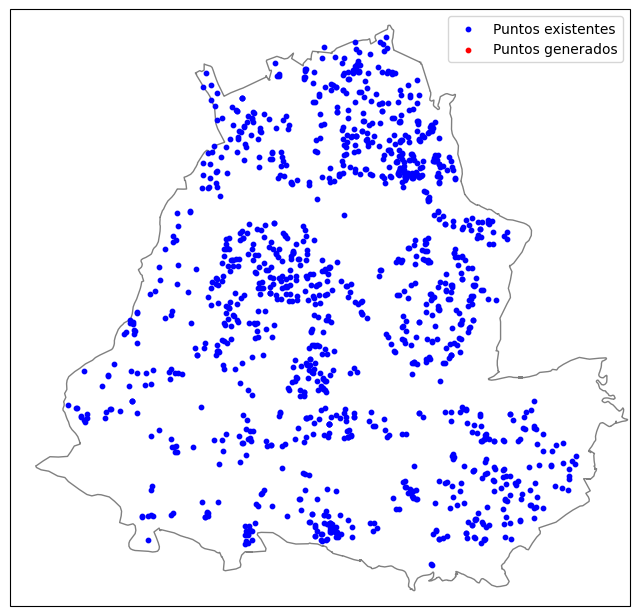

In [ ]:
# Crear una proyección y configurar el gráfico
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Definir el rango de coordenadas para la visualización
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Agregar geometrías de Floridablanca
reader = shapereader.Reader('68276_urbano.shp')
for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

# Agregar puntos existentes en azul
ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10, label='Puntos existentes')

# Agregar puntos generados en rojo
puntos_x, puntos_y = zip(*puntos_generados)
ax.scatter(puntos_x, puntos_y, zorder=10, c='r', s=10, label='Puntos generados')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
plt.show()

/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.10/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
<ipython-input-21-7018455903e9>:25: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  puntos_generados_cartesianos = [pyproj.transform(u

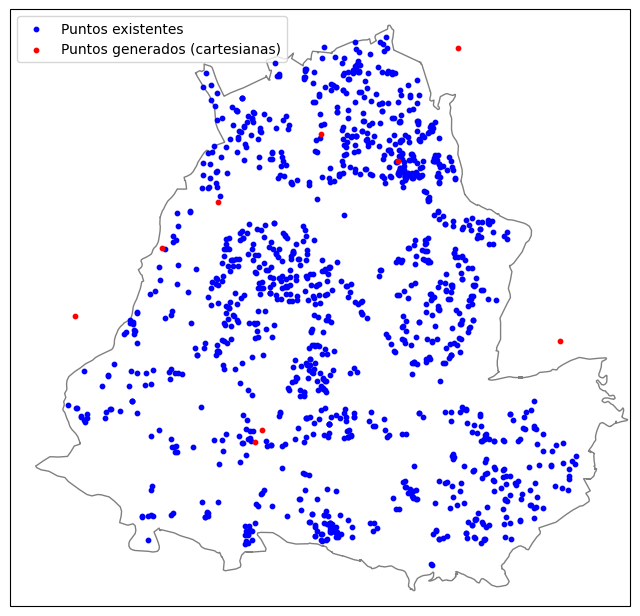

In [ ]:
import random
import pyproj

def generar_puntos_aleatorios(min_x, max_x, min_y, max_y, num_puntos):
    puntos_aleatorios = []
    for _ in range(num_puntos):
        x = random.uniform(min_x, max_x)
        y = random.uniform(min_y, max_y)
        puntos_aleatorios.append((x, y))
    return puntos_aleatorios

# Supongamos que ya tienes los valores mínimos y máximos de x y y en UTM
min_x = min(df['x'])
max_x = max(df['x'])
min_y = min(df['y'])
max_y = max(df['y'])

# Generar 9 puntos aleatorios dentro del espacio definido en UTM
puntos_generados_utm = generar_puntos_aleatorios(min_x, max_x, min_y, max_y, num_puntos=9)

# Definir la proyección UTM (ajusta la zona y el elipsoide según tu configuración)
utm_proj = pyproj.Proj(init='epsg:32618')  # UTM Zone 18T

# Convertir los puntos UTM a coordenadas cartesianas normales
puntos_generados_cartesianos = [pyproj.transform(utm_proj, pyproj.Proj(init='epsg:4326'), punto[0], punto[1]) for punto in puntos_generados_utm]

# Crear una proyección y configurar el gráfico
subplot_kw = dict(projection=ccrs.PlateCarree())
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

# Definir el rango de coordenadas para la visualización
lower_lon = -73.1215
upper_lon = -73.0732
lower_lat = 7.054
upper_lat = 7.1005
ax.set_extent([lower_lon, upper_lon, lower_lat, upper_lat])

# Agregar geometrías de Floridablanca
reader = shapereader.Reader('68276_urbano.shp')
for poli in reader.geometries():
    ax.add_geometries([poli], ccrs.PlateCarree(), facecolor='white', edgecolor='gray')

# Agregar puntos existentes en azul
ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10, label='Puntos existentes')

# Agregar puntos generados en rojo (ahora en coordenadas cartesianas normales)
puntos_x, puntos_y = zip(*puntos_generados_cartesianos)
ax.scatter(puntos_x, puntos_y, zorder=10, c='r', s=10, label='Puntos generados (cartesianas)')

# Agregar leyenda
ax.legend()

# Mostrar el gráfico
plt.show()


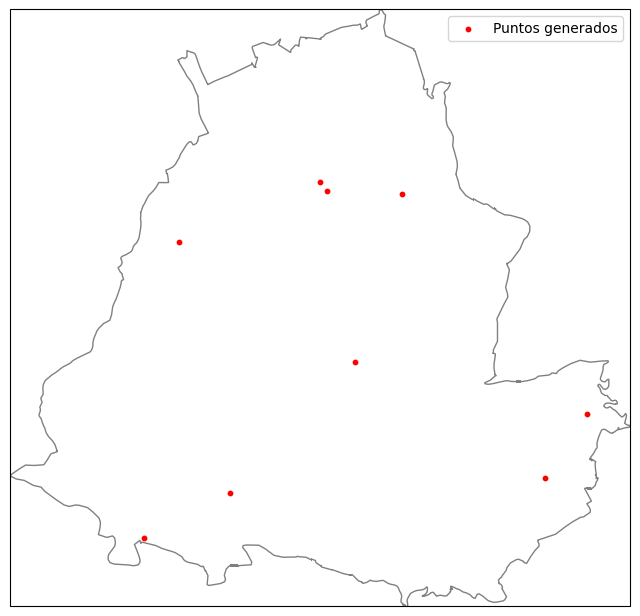

In [ ]:
import random
import geopandas as gpd
import numpy as np

def generar_puntos_aleatorios_dentro_del_shapefile(shapefile_path, num_puntos):
    try:
        # Cargar el shapefile
        gdf = gpd.read_file(shapefile_path)

        # Obtener los límites del shapefile
        min_x, min_y, max_x, max_y = gdf.total_bounds

        puntos_aleatorios = []
        while len(puntos_aleatorios) < num_puntos:
            x = random.uniform(min_x, max_x)
            y = random.uniform(min_y, max_y)
            punto = (x, y)
            # Verificar si el punto está dentro de la figura
            if gdf.geometry.contains(Point(x, y)).any():
                puntos_aleatorios.append(punto)
        return puntos_aleatorios
    except Exception as e:
        print(f"Error al cargar el shapefile: {str(e)}")
        return []

# Ruta al archivo shapefile '68276_urbano.shp'
shapefile_path = '68276_urbano.shp'

# Generar 9 puntos aleatorios dentro de la figura del shapefile
num_puntos = 9
puntos_generados = generar_puntos_aleatorios_dentro_del_shapefile(shapefile_path, num_puntos)

# Verificar si se generaron puntos
if puntos_generados:
    gdf = gpd.read_file(shapefile_path)
    # Crear una proyección y configurar el gráfico
    subplot_kw = dict(projection=ccrs.PlateCarree())
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

    min_x, min_y, max_x, max_y = gdf.total_bounds
    # Definir el rango de coordenadas para la visualización
    ax.set_extent([min_x, max_x, min_y, max_y])

    # Agregar geometrías del shapefile
    gdf.plot(ax=ax, facecolor='white', edgecolor='gray')

    # Agregar puntos generados en rojo
    puntos_x, puntos_y = zip(*puntos_generados)
    ax.scatter(puntos_x, puntos_y, zorder=10, c='r', s=10, label='Puntos generados')

    # Agregar leyenda
    ax.legend()

    # Mostrar el gráfico
    plt.show()
else:
    print("No se generaron puntos dentro de la figura del shapefile.")


<ipython-input-23-cdccf031aaa6>:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colores_clusters = plt.cm.get_cmap('tab20', num_clusters)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1696: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  result = super().scatter(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/cartopy/mpl/geoaxes.py:1696: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* &

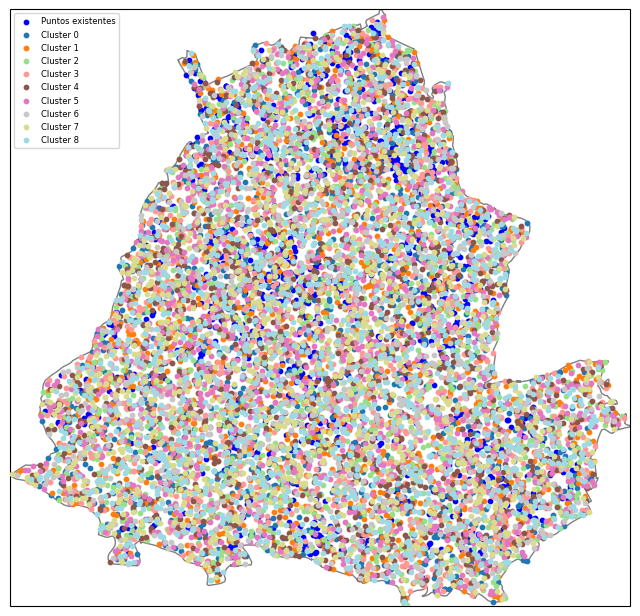

In [ ]:
import random
import geopandas as gpd
import numpy as np
from scipy.spatial import Voronoi
import matplotlib.pyplot as plt
from shapely.geometry import Point
import pandas as pd

def generar_clusters_aleatorios_dentro_del_shapefile(shapefile_path, num_clusters, puntos_por_cluster):
    try:
        # Cargar el shapefile
        gdf = gpd.read_file(shapefile_path)

        # Obtener los límites del shapefile
        min_x, min_y, max_x, max_y = gdf.total_bounds

        clusters = []
        for cluster_id in range(num_clusters):
            # Generar puntos aleatorios dentro del shapefile
            puntos_aleatorios = []
            for _ in range(puntos_por_cluster):
                while True:
                    x = random.uniform(min_x, max_x)
                    y = random.uniform(min_y, max_y)
                    punto = Point(x, y)
                    # Verificar si el punto está dentro de la figura
                    if gdf.geometry.contains(punto).any():
                        puntos_aleatorios.append((x, y))
                        break
            clusters.append({
                'id': cluster_id,
                'puntos': puntos_aleatorios
            })
        return clusters
    except Exception as e:
        print(f"Error al cargar el shapefile: {str(e)}")
        return []

# Ruta al archivo shapefile '68276_urbano.shp'
shapefile_path = '68276_urbano.shp'

# Generar clusters de 8 puntos cada uno dentro de la figura del shapefile
num_clusters = 9  # Número de clusters
puntos_por_cluster = 1262  # Puntos por cluster
clusters_generados = generar_clusters_aleatorios_dentro_del_shapefile(shapefile_path, num_clusters, puntos_por_cluster)

# Verificar si se generaron clusters
if clusters_generados:
    # Crear una proyección y configurar el gráfico
    subplot_kw = dict(projection=ccrs.PlateCarree())
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=subplot_kw)

    # Definir el rango de coordenadas para la visualización
    ax.set_extent([min_x, max_x, min_y, max_y])

    # Agregar geometrías del shapefile
    gdf.plot(ax=ax, facecolor='white', edgecolor='gray')

    # Definir una paleta de colores para los clusters
    colores_clusters = plt.cm.get_cmap('tab20', num_clusters)

    # Agregar puntos existentes en azul
    ax.scatter(df['longitud'], df['latitud'], zorder=10, c='b', s=10, label='Puntos existentes')

    # Agregar clusters de puntos generados con colores distintos
    for cluster in clusters_generados:
        cluster_id = cluster['id']
        puntos = cluster['puntos']
        puntos_x, puntos_y = zip(*puntos)
        color = colores_clusters(cluster_id)
        ax.scatter(puntos_x, puntos_y, zorder=10, c=color, s=10, label=f'Cluster {cluster_id}')

    # Agregar leyenda
    ax.legend(loc=2, prop={'size': 6})

    # Mostrar el gráfico
    plt.show()

    # Guardar los clusters en una lista o variable para su análisis posterior
    # En este ejemplo, los clusters se almacenan en una lista llamada 'clusters_generados'
else:
    print("No se generaron clusters dentro de la figura del shapefile.")


In [ ]:
clusters_generados

[{'id': 0,
  'puntos': [(-73.09558462406643, 7.080687142474264),
   (-73.0837121058904, 7.065611534519967),
   (-73.094378697556, 7.058709113705993),
   (-73.10145975544566, 7.092439263618747),
   (-73.10333129924439, 7.077133576921391),
   (-73.11250248257825, 7.067721194499379),
   (-73.0954834454176, 7.0823501536589),
   (-73.09856647055958, 7.064385580748782),
   (-73.1096363712831, 7.0807453726472485),
   (-73.0830310942734, 7.08329357778352),
   (-73.08409399541735, 7.079419303602101),
   (-73.09038816357639, 7.082636395822208),
   (-73.07740453439487, 7.06395718214748),
   (-73.09419227333451, 7.087501349430345),
   (-73.09163223916866, 7.08533095231044),
   (-73.09842474719387, 7.066393292113335),
   (-73.11228931768748, 7.060671539356152),
   (-73.08483487133617, 7.057745824485407),
   (-73.10184636380426, 7.07770243721741),
   (-73.10241494208447, 7.063255767253614),
   (-73.10127012302604, 7.076074133339247),
   (-73.09314782505001, 7.088868960146439),
   (-73.07847716477387

In [ ]:
puntos_originales = list(zip(df['longitud'], df['latitud']))
lista_completa = [{'id': 'Puntos originales', 'puntos': puntos_originales}]
lista_completa.extend(clusters_generados)

In [ ]:
import pyproj

# Definir la proyección UTM adecuada para tu zona geográfica
utm_proj = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

# Crear una nueva lista para almacenar los puntos en UTM
lista_completa_utm = []

# Iterar a través de lista_completa y transformar los puntos a UTM
for grupo in lista_completa:
    puntos_grupo_utm = [utm_proj(lon, lat) for lon, lat in grupo['puntos']]
    grupo_utm = {'id': grupo['id'], 'puntos': puntos_grupo_utm}
    lista_completa_utm.append(grupo_utm)

# Imprimir la nueva lista con puntos en UTM
for grupo in lista_completa_utm:
    print(f'Grupo: {grupo["id"]}')
    print(len(grupo['puntos']))


Grupo: Puntos originales
1262
Grupo: 0
1262
Grupo: 1
1262
Grupo: 2
1262
Grupo: 3
1262
Grupo: 4
1262
Grupo: 5
1262
Grupo: 6
1262
Grupo: 7
1262
Grupo: 8
1262


In [ ]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial import ConvexHull

def calcular_estimador_k_y_area(cluster, dist_max):
    # Extraer los puntos del cluster
    puntos_cluster = np.array(cluster['puntos'])
    n = len(puntos_cluster)  # Número de puntos en el cluster
    k_values = []  # Almacenará los valores de K para cada punto en el cluster

    for i in range(n):
        point = puntos_cluster[i]
        distances = distance.cdist([point], puntos_cluster, 'euclidean')[0]

        # Excluimos la distancia a sí mismo
        distances = distances[distances > 0]

        # Calcula la función K para la distancia actual
        k_value = np.sum(distances <= dist_max)
        k_values.append(k_value)

    # Calcular el cierre convexo del cluster
    hull = ConvexHull(puntos_cluster)

    # Calcular el área del cierre convexo
    area = hull.volume

    # Calcular la sumatoria de los valores de K
    sumatoria = sum(k_values) / 2

    # Calcular Kr
    Kr = area / n**2

    # Calcular el Estimador K
    estimador_k = Kr * sumatoria

    return {
        'id': cluster['id'],
        'EstimadorK': estimador_k,
        'Area': area
    }

# Especifica la distancia máxima en metros
dist_max = 100.0  # 100 metros en UTM

# Calcular el Estimador K y el área para cada cluster
resultados_clusters = [calcular_estimador_k_y_area(cluster, dist_max) for cluster in lista_completa_utm]

# Imprimir los resultados para cada cluster
for resultado in resultados_clusters:
    print(f'Cluster {resultado["id"]}:')
    print(f'Estimador K = {resultado["EstimadorK"]:.2f}')
    print(f'Área del cierre convexo = {resultado["Area"]:.2f} metros cuadrados')
    print()


Cluster Puntos originales:
Estimador K = 34741.63
Área del cierre convexo = 14018507.31 metros cuadrados

Cluster 0:
Estimador K = 16589.36
Área del cierre convexo = 15642955.34 metros cuadrados

Cluster 1:
Estimador K = 16648.21
Área del cierre convexo = 16011272.40 metros cuadrados

Cluster 2:
Estimador K = 16780.03
Área del cierre convexo = 15813379.50 metros cuadrados

Cluster 3:
Estimador K = 15940.28
Área del cierre convexo = 15661433.63 metros cuadrados

Cluster 4:
Estimador K = 16208.80
Área del cierre convexo = 15740757.74 metros cuadrados

Cluster 5:
Estimador K = 16439.62
Área del cierre convexo = 15668739.89 metros cuadrados

Cluster 6:
Estimador K = 16389.35
Área del cierre convexo = 15372438.47 metros cuadrados

Cluster 7:
Estimador K = 17596.17
Área del cierre convexo = 15577786.95 metros cuadrados

Cluster 8:
Estimador K = 17238.39
Área del cierre convexo = 15860556.98 metros cuadrados



In [ ]:
import numpy as np
from scipy.spatial import distance
from scipy.spatial import ConvexHull
import pandas as pd

def calcular_estimador_k_y_area(cluster, dist_max):
    # Extraer los puntos del cluster
    puntos_cluster = np.array(cluster['puntos'])
    n = len(puntos_cluster)  # Número de puntos en el cluster
    k_values = []  # Almacenará los valores de K para cada punto en el cluster

    for i in range(n):
        point = puntos_cluster[i]
        distances = distance.cdist([point], puntos_cluster, 'euclidean')[0]

        # Excluimos la distancia a sí mismo
        distances = distances[distances > 0]

        # Calcula la función K para la distancia actual
        k_value = np.sum(distances <= dist_max)
        k_values.append(k_value)

    # Calcular el cierre convexo del cluster
    hull = ConvexHull(puntos_cluster)

    # Calcular el área del cierre convexo
    area = hull.volume

    # Calcular la sumatoria de los valores de K
    sumatoria = sum(k_values) / 2

    # Calcular Kr
    Kr = area / n**2

    # Calcular el Estimador K
    estimador_k = Kr * sumatoria

    return {
        'id': cluster['id'],
        'EstimadorK': estimador_k,
        'Area': area
    }

# Especifica las distancias máximas en metros
dist_max_values = list(range(20, 201, 20))  # Valores de 20 a 200 en incrementos de 20 metros

# Crear una lista para almacenar los resultados
resultados_clusters = []

# Calcular el Estimador K para cada distancia máxima
for dist_max in dist_max_values:
    resultados_clusters_dist_max = [calcular_estimador_k_y_area(cluster, dist_max) for cluster in lista_completa_utm]
    resultados_clusters.append(resultados_clusters_dist_max)

# Crear un DataFrame para los resultados
df_resultados = pd.DataFrame()

# Agregar los resultados al DataFrame
for i, dist_max in enumerate(dist_max_values):
    df_temp = pd.DataFrame({
        'Cluster': [resultado['id'] for resultado in resultados_clusters[i]],
        f'EstimadorK_{dist_max}m': [resultado['EstimadorK'] for resultado in resultados_clusters[i]]
    })
    if i == 0:
        df_resultados = df_temp
    else:
        df_resultados = pd.merge(df_resultados, df_temp, on='Cluster')

# Imprimir el DataFrame
print(df_resultados)


             Cluster  EstimadorK_20m  EstimadorK_40m  EstimadorK_60m  \
0  Puntos originales     3318.366978     8238.704220    15702.829412   
1                  0      992.022379     2858.203091     6079.820320   
2                  1      733.888355     2925.500155     6011.852552   
3                  2      754.604822     2690.761931     6046.767586   
4                  3      708.019634     2733.742475     5939.498038   
5                  4      820.323244     2520.270207     5781.796356   
6                  5      639.482579     2646.474059     5863.563342   
7                  6      656.346186     2741.210543     6051.897924   
8                  7      792.267916     2836.514761     6338.143327   
9                  8      617.435241     2698.789523     6214.186945   

   EstimadorK_80m  EstimadorK_100m  EstimadorK_120m  EstimadorK_140m  \
0    24812.935040     34741.629870     46342.711240     59985.864597   
1    10656.874067     16589.364330     23504.054969     32137.5

In [ ]:
df_resultados

,Cluster,EstimadorK_20m,EstimadorK_40m,EstimadorK_60m,EstimadorK_80m,EstimadorK_100m,EstimadorK_120m,EstimadorK_140m,EstimadorK_160m,EstimadorK_180m,EstimadorK_200m
0,Puntos originales,3318.366978,8238.704220,15702.829412,24812.935040,34741.629870,46342.711240,59985.864597,75204.582115,90484.913874,107604.870828
1,0,992.022379,2858.203091,6079.820320,10656.874067,16589.364330,23504.054969,32137.596264,41989.066023,52950.422206,65453.832977
2,1,733.888355,2925.500155,6011.852552,10857.526348,16648.207068,24208.262451,32924.443325,42877.175811,53533.636857,66321.390112
3,2,754.604822,2690.761931,6046.767586,10822.621788,16780.028276,23968.632106,32457.936352,42108.934864,53130.136868,65124.381932
4,3,708.019634,2733.742475,5939.498038,10364.620749,15940.275364,23069.639731,31988.720395,41723.990358,53111.306133,65137.806300
5,4,820.323244,2520.270207,5781.796356,10565.368043,16208.796623,23502.755103,32210.041582,42528.324310,53736.114170,65872.944812
6,5,639.482579,2646.474059,5863.563342,10418.646946,16439.621385,23552.635305,32239.760190,42018.924556,52958.995759,64971.430056
7,6,656.346186,2741.210543,6051.897924,10453.278233,16389.350359,23763.592806,31861.746488,41629.722085,52546.303508,64794.881603
8,7,792.267916,2836.514761,6338.143327,11189.561676,17596.172600,25166.732685,33285.033552,43105.243274,54333.929292,66247.291286
9,8,617.435241,2698.789523,6214.186945,10815.075357,17238.393593,24916.499579,33311.627134,43170.673730,54643.018860,66981.765054


In [ ]:
# Ordenar los valores de cada distancia de menor a mayor
df_resultados_sorted = df_resultados.sort_values(by='EstimadorK_20m')

# Calcular los percentiles 25 y 97.5
percentil_2_5 = df_resultados_sorted.quantile(0.025)
percentil_97_5 = df_resultados_sorted.quantile(0.975)

# Imprimir los percentiles
print("Percentil 2.5:")
print(percentil_2_5)

print("\nPercentil 97.5:")
print(percentil_97_5)

Percentil 2.5:
EstimadorK_20m       622.395892
EstimadorK_40m      2548.666073
EstimadorK_60m      5800.193928
EstimadorK_80m     10376.776643
EstimadorK_100m    16000.692647
EstimadorK_120m    23167.090690
EstimadorK_140m    31890.315617
EstimadorK_160m    41650.932446
EstimadorK_180m    52637.230215
EstimadorK_200m    64834.605005
Name: 0.025, dtype: float64

Percentil 97.5:
EstimadorK_20m      2794.939443
EstimadorK_40m      7043.233306
EstimadorK_60m     13595.775043
EstimadorK_80m     21747.676033
EstimadorK_100m    30883.901984
EstimadorK_120m    41578.116065
EstimadorK_140m    53984.161168
EstimadorK_160m    67996.952728
EstimadorK_180m    82420.487496
EstimadorK_200m    98464.672029
Name: 0.975, dtype: float64


<ipython-input-30-1dce528352b3>:5: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentil_2_5 = df_resultados_sorted.quantile(0.025)
<ipython-input-30-1dce528352b3>:6: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentil_97_5 = df_resultados_sorted.quantile(0.975)


In [ ]:
# Crear un diccionario para almacenar los resultados de percentiles
percentiles_dict = {}

# Iterar a través de las columnas del DataFrame
for col in df_resultados.columns:
    if col != 'Cluster':  # Excluir la columna 'Cluster'
        # Ordenar los valores de la columna actual
        sorted_values = df_resultados.sort_values(by=col)[col]

        # Calcular los percentiles 25 y 97.5
        percentile_2_5 = sorted_values.quantile(0.025)
        percentile_97_5 = sorted_values.quantile(0.975)

        # Agregar los percentiles al diccionario
        percentiles_dict[f'Percentil_2_5_{col}'] = percentile_2_5
        percentiles_dict[f'Percentil_97_5_{col}'] = percentile_97_5

# Crear un DataFrame con los resultados de los percentiles
df_percentiles = pd.DataFrame.from_dict(percentiles_dict, orient='index', columns=['Valor'])

# Imprimir el DataFrame de percentiles
print(df_percentiles)


                                       Valor
Percentil_2_5_EstimadorK_20m      622.395892
Percentil_97_5_EstimadorK_20m    2794.939443
Percentil_2_5_EstimadorK_40m     2548.666073
Percentil_97_5_EstimadorK_40m    7043.233306
Percentil_2_5_EstimadorK_60m     5800.193928
Percentil_97_5_EstimadorK_60m   13595.775043
Percentil_2_5_EstimadorK_80m    10376.776643
Percentil_97_5_EstimadorK_80m   21747.676033
Percentil_2_5_EstimadorK_100m   16000.692647
Percentil_97_5_EstimadorK_100m  30883.901984
Percentil_2_5_EstimadorK_120m   23167.090690
Percentil_97_5_EstimadorK_120m  41578.116065
Percentil_2_5_EstimadorK_140m   31890.315617
Percentil_97_5_EstimadorK_140m  53984.161168
Percentil_2_5_EstimadorK_160m   41650.932446
Percentil_97_5_EstimadorK_160m  67996.952728
Percentil_2_5_EstimadorK_180m   52637.230215
Percentil_97_5_EstimadorK_180m  82420.487496
Percentil_2_5_EstimadorK_200m   64834.605005
Percentil_97_5_EstimadorK_200m  98464.672029


In [ ]:
df_percentiles

,Valor
Percentil_2_5_EstimadorK_20m,622.395892
Percentil_97_5_EstimadorK_20m,2794.939443
Percentil_2_5_EstimadorK_40m,2548.666073
Percentil_97_5_EstimadorK_40m,7043.233306
Percentil_2_5_EstimadorK_60m,5800.193928
Percentil_97_5_EstimadorK_60m,13595.775043
Percentil_2_5_EstimadorK_80m,10376.776643
Percentil_97_5_EstimadorK_80m,21747.676033
Percentil_2_5_EstimadorK_100m,16000.692647
Percentil_97_5_EstimadorK_100m,30883.901984


In [ ]:
# Crear un DataFrame para los percentiles 2.5 y 97.5
df_percentiles_2_5_97_5 = pd.DataFrame(columns=['Distancia', 'Percentil_2.5', 'Percentil_97.5'])

# Crear una lista de distancias de 20 a 200 en incrementos de 20
distancias = list(range(20, 201, 20))

# Iterar a través de las distancias y calcular los percentiles 2.5 y 97.5
for distancia in distancias:
    columna_percentil_2_5 = f'Percentil_2_5_EstimadorK_{distancia}m'
    columna_percentil_97_5 = f'Percentil_97_5_EstimadorK_{distancia}m'

    percentil_2_5 = df_percentiles.at[columna_percentil_2_5, 'Valor']
    percentil_97_5 = df_percentiles.at[columna_percentil_97_5, 'Valor']

    df_percentiles_2_5_97_5 = pd.concat([df_percentiles_2_5_97_5, pd.DataFrame({'Distancia': [distancia], 'Percentil_2.5': [percentil_2_5], 'Percentil_97.5': [percentil_97_5]})], ignore_index=True)

# Crear un DataFrame para los valores reales de K
df_valores_reales_K = pd.DataFrame(columns=['Distancia', 'Valor_Real_K'])

# Iterar a través de las distancias y obtener los valores reales de K
for distancia in distancias:
    columna_valor_real_K = f'EstimadorK_{distancia}m'

    valor_real_K = df_resultados.at[0, columna_valor_real_K]  # Tomar el valor de K del primer cluster

    df_valores_reales_K = pd.concat([df_valores_reales_K, pd.DataFrame({'Distancia': [distancia], 'Valor_Real_K': [valor_real_K]})], ignore_index=True)

# Combinar los DataFrames de percentiles y valores reales de K
df_final = pd.merge(df_percentiles_2_5_97_5, df_valores_reales_K, on='Distancia')

# Imprimir el DataFrame final
df_final


,Distancia,Percentil_2.5,Percentil_97.5,Valor_Real_K
0,20,622.395892,2794.939443,3318.366978
1,40,2548.666073,7043.233306,8238.704220
2,60,5800.193928,13595.775043,15702.829412
3,80,10376.776643,21747.676033,24812.935040
4,100,16000.692647,30883.901984,34741.629870
5,120,23167.090690,41578.116065,46342.711240
6,140,31890.315617,53984.161168,59985.864597
7,160,41650.932446,67996.952728,75204.582115
8,180,52637.230215,82420.487496,90484.913874
9,200,64834.605005,98464.672029,107604.870828


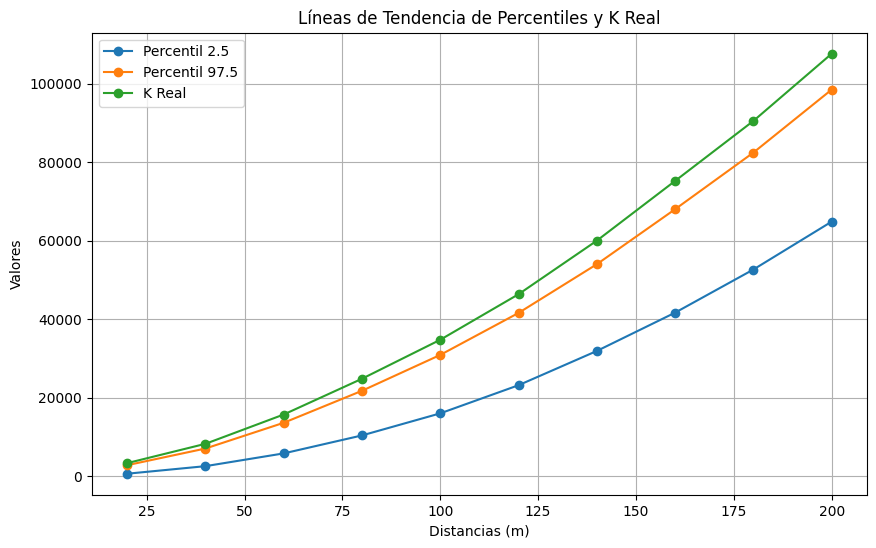

In [ ]:
import matplotlib.pyplot as plt

# Extraer las columnas de interés de df_final
distancias = df_final['Distancia']
percentil_2_5 = df_final['Percentil_2.5']
percentil_97_5 = df_final['Percentil_97.5']
valor_real_K = df_final['Valor_Real_K']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Agregar líneas de tendencia para los percentiles
ax.plot(distancias, percentil_2_5, label='Percentil 2.5', marker='o')
ax.plot(distancias, percentil_97_5, label='Percentil 97.5', marker='o')
ax.plot(distancias, valor_real_K, label='K Real', marker='o')

# Etiquetas de los ejes y título
ax.set_xlabel('Distancias (m)')
ax.set_ylabel('Valores')
ax.set_title('Líneas de Tendencia de Percentiles y K Real')

# Mostrar la leyenda
ax.legend()

# Mostrar la figura
plt.grid()
plt.show()


**Conclusiones:** Existe una tendencia significativa de aglomeración o agrupamiento de puntos geográficos en el conjunto de datos. Puede ser indicativo de patrones espaciales o de comportamientos que provocan que los puntos se agrupen en esa distancia específica.